# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
#changing the working directory
#%cd /content/drive/My Drive/data-science-2

In [8]:
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [9]:
df = pd.read_csv("athletes.csv")

In [10]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [11]:
# Verificando se a importação obteve sucesso
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


A importação foi concluída com sucesso. Ok! Vamos iniciar com a EDA dos dataset.

In [19]:
# Sumarizando os dados para as variáveis de interesse
df[['height', 'weight']].dropna().describe()

,height,weight
count,10858.000000,10858.000000
mean,1.766942,72.070915
std,0.113111,16.162358
min,1.210000,31.000000
25%,1.690000,60.000000
50%,1.760000,70.000000
75%,1.840000,81.000000
max,2.210000,170.000000


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [20]:
def q1(alpha=0.05):
  # Realizando a amostragem
  sample1 = get_sample(df, 'height', n=3000)
  # Aplicando teste de Shapiro-Wilk
  statistics, p_value = sct.shapiro(sample1)
  # Avaliando o resultado em função do p-value
  if p_value > alpha: # Aceita-se H0
    return True
  else: #Rejeita-se H0
    return False

In [21]:
# Resposta
q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

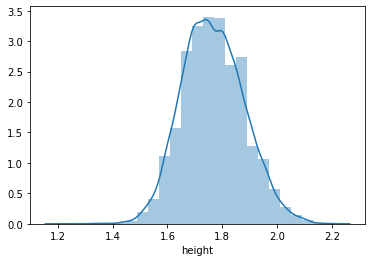

In [55]:
from scipy.stats import norm
ax = sns.distplot(df['height'], bins=25)

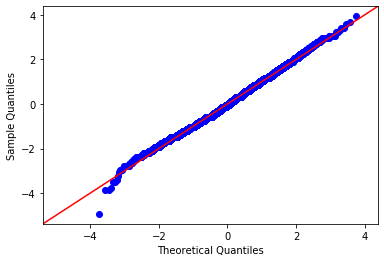

In [18]:
# Removendo NaN para gerar gráfico do QQplot
height_T = df['height'].dropna(how='any', axis=0)
sm.qqplot(height_T, fit=True, line="45");

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [24]:
def q2(alpha=0.05):
  # Realizando a amostragem
  sample2 = get_sample(df, 'height', n=3000)
  # Aplicando teste de de normalidade de Jarque-Bera
  statistics, p_value = sct.stats.jarque_bera(sample2)
  # Avaliando o resultado em função do p-value
  if p_value > alpha: # Aceita-se H0
    return True
  else: #Rejeita-se H0
    return False

In [25]:
# Resposta
q2()

False

__Para refletir__:

* Esse resultado faz sentido?

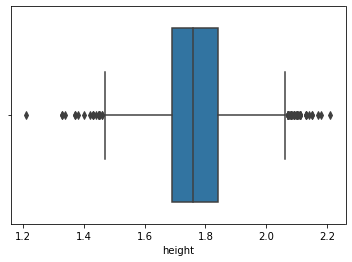

In [26]:
ax = sns.boxplot(x=df['height'])

Observa-se a presença de outliers em ambas as extremidade, o que demonstra a assimetria na distribuição e reforça o resultado do teste aplicado. 

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [35]:
def q3(alpha=0.05):
  # Realizando a amostragem
  sample3 = get_sample(df, 'weight', n=3000)
  # Aplicando teste de normalidade de D'Agostino-Pearson 
  statistics, p_value = sct.normaltest(sample3)
  # Avaliando o resultado em função do p-value
  if p_value > alpha: # Aceita-se H0
    return True
  else: #Rejeita-se H0
    return False

In [36]:
# Resposta
q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


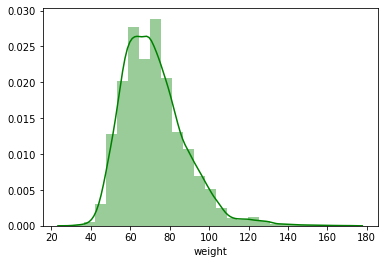

In [41]:
ax = sns.distplot(df['weight'], bins=25, color='g')

Observa-se no histograma assimetria a direita, reforçando os valores do teste aplicado de não normalidade.

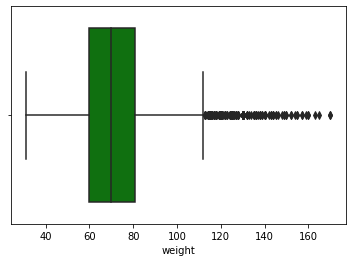

In [42]:
ax = sns.boxplot(x=df['weight'], color='g')

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [43]:
def q4(alpha=0.05):
    # Transformacao log na variavel inteira
    df['log_weight']= np.log(df['weight'])
    # Coletando uma amostra
    sample4 = get_sample(df, 'log_weight', n=3000)
    # Fazer teste
    statistics, p_value = sct.normaltest(sample4)
    # Avaliar resultado a partir do p-valor
    if p_value > alpha: # Aceitamos H0
        return True
    else: # Rejeitamos H0
        return False

In [44]:
q4()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


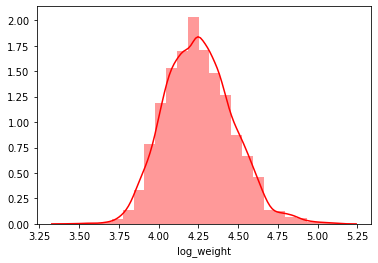

In [46]:
ax = sns.distplot(df['log_weight'], bins=25, color='r')

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

In [47]:
df.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze', 'log_weight'],
      dtype='object')

In [48]:
# Definindo os dataset das questões 5, 6 e 7
nac_df = df[(df['nationality'] == 'USA')|(df['nationality'] == 'BRA')|(df['nationality'] == 'CAN')]
#Mantendo apenas as colunas de interesse e removendo NaN
nac_df = nac_df[['nationality','height']].dropna()
# Criando amostras de cada pais
bra = df.loc[df['nationality'] == 'BRA', 'height']
can = df.loc[df['nationality'] == 'CAN', 'height']
usa = df.loc[df['nationality'] == 'USA', 'height']

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [49]:
def q5(alpha=0.05):
  # Realizando teste T
  statistics, p_value = sct.ttest_ind(bra, usa, equal_var=False, nan_policy='omit')
  # Avaliando resultado a partir de p_value
  if p_value > alpha: #Aceita-se H0
    return True
  else: # Rejeita-se H0 (p_value <= alpha )
      return False

In [50]:
# Resposta
q5()

False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [51]:
def q6(alpha=0.05):
  # Realizando Teste T
  statistics, p_value = sct.ttest_ind(bra, can, equal_var=False, nan_policy='omit')
  # Avaliando os resultados obtidos
  if p_value > alpha: # Aceita-se H0
    return True
  else: # Rejeita-se H0 (p_value <= alpha )
    return False

In [52]:
# Resposta
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [53]:
def q7(alpha=0.05):
  # Realizando Teste T
  statistics, p_value = sct.ttest_ind(usa,can, equal_var=False, nan_policy='omit')
  return float(round(p_value,8))

In [54]:
# Resposta
q7()

0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?